In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
import re
import os
import matplotlib.pyplot as plt

In [35]:
data_Gucci = pd.read_csv('data/df_Gucci_canada_US.csv')
data_LV = pd.read_csv('data/df_LV_canada_UK.csv')
data_LP = pd.read_csv('data/df_LP_canada_US.csv')

data = pd.concat([data_Gucci, data_LV, data_LP], ignore_index=True)

In [36]:
# Write the DataFrame back to a CSV file
data.to_csv('Final_data.csv', index=False)
data

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount,Category,Group
0,Gucci,2023-11-17,CAN,CAD,GUCCI,MAKE-UP,LIPS,N.A.,6478599PL139216,216 My Cousin Rachel Rouge De Beauté Brillant,https://www.gucci.com/ca/en/pr/beauty/make-up/...,http://media.gucci.com/style/White_South_0_160...,61.0,61.0,41.07,41.07,0,MAKEUP,OTHER
1,Gucci,2023-11-17,CAN,CAD,GUCCI,FINE-JEWELRY,FINE-JEWELRY-FOR-WOMEN,N.A.,702394J85H08268,Gucci Link to Love baguette tourmaline necklace,https://www.gucci.com/ca/en/pr/jewelry-watches...,http://media.gucci.com/style/White_South_0_160...,5630.0,5630.0,3791.24,3791.24,0,ACCESSORIES,WOMEN
2,Gucci,2023-11-17,CAN,CAD,GUCCI,MAKE-UP,FACE,N.A.,7026019PRD99005,05 Gucci Blush De Beauté,https://www.gucci.com/ca/en/pr/beauty/make-up/...,http://media.gucci.com/style/White_South_0_160...,67.0,67.0,45.11,45.11,0,MAKEUP,OTHER
3,Gucci,2023-11-17,CAN,CAD,GUCCI,HANDBAGS,SHOULDER-BAGS-FOR-WOMEN,N.A.,702721U3ZDT3760,Gucci Diana small tote bag,https://www.gucci.com/ca/en/pr/women/handbags/...,http://media.gucci.com/style/White_South_0_160...,5155.0,5155.0,3471.38,3471.38,0,BAGS,WOMEN
4,Gucci,2023-11-17,CAN,CAD,GUCCI,FINE-JEWELRY,FINE-JEWELRY-FOR-WOMEN,N.A.,745649J85008000,Gucci Link to Love double earrings,https://www.gucci.com/ca/en/pr/jewelry-watches...,http://media.gucci.com/style/White_South_0_160...,7670.0,7670.0,5164.98,5164.98,0,ACCESSORIES,WOMEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28576,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,TROUSERS-AND-SHORTS,N.A.,FAN4351,G,https://us.loropiana.com/en/p/woman/trousers-a...,https://media.loropiana.com/HYBRIS/FAN/FAN4351...,9625.0,9625.0,8879.15,8879.15,0,CLOTHING,WOMEN
28577,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,ACCESSORIES,HATS,FAN4625,E,https://us.loropiana.com/en/p/woman/accessorie...,https://media.loropiana.com/HYBRIS/FAN/FAN4625...,750.0,750.0,691.88,691.88,0,ACCESSORIES,WOMEN
28578,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,LEATHER-GOODS,TOP-HANDLE-AND-TOTES,FAN4833,L,https://us.loropiana.com/en/p/fall-winter/woma...,https://media.loropiana.com/HYBRIS/FAN/FAN4833...,5325.0,5325.0,4912.36,4912.36,0,BAGS,WOMEN
28579,Loro Piana,2023-11-17,USA,USD,LORO PIANA,MAN,KNITWEAR,N.A.,FAN4943,S,https://us.loropiana.com/p/holiday-season/man/...,https://media.loropiana.com/HYBRIS/FAN/FAN4943...,6600.0,6600.0,6088.56,6088.56,0,CLOTHING,MEN


In [37]:
#Features
X =  data[['website_name', 'country_code', 'brand', 'product_code','title', 'Group', 'full_price_eur' ]]

#Labels
y = data['Category']

In [38]:
# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

#convert string features to numeric form
string_features =['website_name', 'country_code', 'brand', 'product_code','title', 'Group']

for feature in string_features:
    # Apply LabelEncoder to each string column
    X.loc[:,feature] = label_encoder.fit_transform(X[feature])

X

,website_name,country_code,brand,product_code,title,Group,full_price_eur
0,0,0,0,2083,162,5,41.07
1,0,0,0,3341,4124,6,3791.24
2,0,0,0,3367,60,5,45.11
3,0,0,0,3384,4039,6,3471.38
4,0,0,0,5658,4134,6,5164.98
...,...,...,...,...,...,...,...
28576,1,2,1,8696,3193,6,8879.15
28577,1,2,1,8741,2667,6,691.88
28578,1,2,1,8761,4974,6,4912.36
28579,1,2,1,8768,9018,4,6088.56


In [39]:
y.unique()

array(['MAKEUP', 'ACCESSORIES', 'BAGS', 'SHOES', 'BOYS', 'GIRLS',
       'CLOTHING', 'DECOR/HOME', 'KIDS', 'TRAVEL', 'WATCHES',
       'FRAGRANCES', 'GIFTS', 'OTHER'], dtype=object)

In [40]:
#test train split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

In [41]:
def defineModels():
    model_knn_neighbours = make_pipeline(
                       StandardScaler(),
                       KNeighborsClassifier(n_neighbors=13))

    model_random_forest = make_pipeline(
        StandardScaler(),
        RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_leaf=2))
    
    model_gradient_boosting = make_pipeline(
        StandardScaler(),
        GradientBoostingClassifier(n_estimators=50, max_depth=2,min_samples_leaf=0.5))

    model_nb = make_pipeline(
        StandardScaler(),
        GaussianNB())

    return model_knn_neighbours, model_random_forest, model_gradient_boosting, model_nb

In [42]:
model_knn_neighbours, model_random_forest, model_gradient_boosting, model_nb   = defineModels()

In [43]:
# K nearest Neighbours
model_knn_neighbours.fit(X_train, y_train)

#Printing model accuracy
print("Results for K nearest Neighbours:")

y_pred = model_knn_neighbours.predict(X_valid)

# Accuracy
accuracy_knn_neighbours = accuracy_score(y_valid, y_pred)
print("Accuracy score of Model:", accuracy_knn_neighbours)   

#Truth vs Prediction
df_knn_neighbours = pd.DataFrame({'truth': y_valid, 'prediction': y_pred})
print("Number of Incorrect predictions:" , len(df_knn_neighbours[df_knn_neighbours['truth'] != df_knn_neighbours['prediction']]))

#classification_report
print(classification_report(y_valid,model_knn_neighbours.predict(X_valid),zero_division=0))

Results for K nearest Neighbours:
Accuracy score of Model: 0.7173342662235438
Number of Incorrect predictions: 1616
              precision    recall  f1-score   support

 ACCESSORIES       0.75      0.79      0.77      1603
        BAGS       0.69      0.66      0.68       662
        BOYS       1.00      1.00      1.00        62
    CLOTHING       0.67      0.73      0.70      1459
  DECOR/HOME       0.71      0.73      0.72       291
  FRAGRANCES       0.65      0.57      0.61        42
       GIFTS       0.57      0.27      0.37        74
       GIRLS       1.00      0.99      0.99        96
        KIDS       0.96      0.99      0.97       135
      MAKEUP       0.96      0.98      0.97       106
       OTHER       0.61      0.20      0.30        56
       SHOES       0.67      0.62      0.64       862
      TRAVEL       0.62      0.48      0.54       195
     WATCHES       0.53      0.53      0.53        74

    accuracy                           0.72      5717
   macro avg      

In [44]:
#random forest results
model_random_forest.fit(X_train, y_train)

#Printing model accuracy
print("Results for Random Forest Classifier:")

y_pred_random_forest = model_random_forest.predict(X_valid)

print("Accuracy score of Model",accuracy_score(y_valid, y_pred_random_forest))

#Truth vs Prediction
df_random_forest = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_random_forest})
print("Number of Incorrect predictions RandomForest Model :" , len(df_random_forest[df_random_forest['truth'] != df_random_forest['prediction']]))

#classification_report
print(classification_report(y_valid,model_random_forest.predict(X_valid), zero_division=0))


Results for Random Forest Classifier:
Accuracy score of Model 0.8483470351582998
Number of Incorrect predictions RandomForest Model : 867
              precision    recall  f1-score   support

 ACCESSORIES       0.85      0.89      0.87      1603
        BAGS       0.89      0.84      0.86       662
        BOYS       1.00      1.00      1.00        62
    CLOTHING       0.79      0.89      0.84      1459
  DECOR/HOME       0.88      0.82      0.85       291
  FRAGRANCES       0.90      0.88      0.89        42
       GIFTS       0.88      0.47      0.61        74
       GIRLS       1.00      1.00      1.00        96
        KIDS       0.99      0.99      0.99       135
      MAKEUP       0.99      1.00      1.00       106
       OTHER       0.73      0.48      0.58        56
       SHOES       0.83      0.73      0.78       862
      TRAVEL       0.87      0.70      0.78       195
     WATCHES       0.95      0.84      0.89        74

    accuracy                           0.85      5

In [45]:
#Gradient Boosting 
model_gradient_boosting.fit(X_train, y_train)

#Printing model accuracy
print("Results for Gradient boosting Classifier:")

y_pred_gradient_boosting = model_gradient_boosting.predict(X_valid)

print("Accuracy score of Model",accuracy_score(y_valid, y_pred_gradient_boosting))

#Truth vs Prediction
df_gradient_boosting = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_gradient_boosting})
print("Number of Incorrect predictions:" , len(df_gradient_boosting[df_gradient_boosting['truth'] != df_gradient_boosting['prediction']]))

#classification_report
print(classification_report(y_valid,model_gradient_boosting.predict(X_valid),zero_division=0))

Results for Gradient boosting Classifier:
Accuracy score of Model 0.2900122441840126
Number of Incorrect predictions: 4059
              precision    recall  f1-score   support

 ACCESSORIES       0.30      0.53      0.38      1603
        BAGS       0.00      0.00      0.00       662
        BOYS       0.00      0.00      0.00        62
    CLOTHING       0.28      0.56      0.38      1459
  DECOR/HOME       0.00      0.00      0.00       291
  FRAGRANCES       0.00      0.00      0.00        42
       GIFTS       0.00      0.00      0.00        74
       GIRLS       0.00      0.00      0.00        96
        KIDS       0.00      0.00      0.00       135
      MAKEUP       0.00      0.00      0.00       106
       OTHER       0.00      0.00      0.00        56
       SHOES       0.00      0.00      0.00       862
      TRAVEL       0.00      0.00      0.00       195
     WATCHES       0.00      0.00      0.00        74

    accuracy                           0.29      5717
   macro av

In [46]:
#Naive_bayes classifier 
model_nb.fit(X_train, y_train)

#Printing model accuracy
print("Results for Naive Bayes Classifier:")

y_pred_model_nb = model_nb.predict(X_valid)

print("Accuracy score of Model",accuracy_score(y_valid, y_pred_model_nb))

#Truth vs Prediction
df_nb = pd.DataFrame({'truth': y_valid, 'prediction': y_pred_model_nb})
print("Number of Incorrect predictions:" , len(df_nb[df_nb['truth'] != df_nb['prediction']]))

#classification_report
print(classification_report(y_valid,model_nb.predict(X_valid),zero_division=0))

Results for Naive Bayes Classifier:
Accuracy score of Model 0.3860416302256428
Number of Incorrect predictions: 3510
              precision    recall  f1-score   support

 ACCESSORIES       0.53      0.33      0.41      1603
        BAGS       0.29      0.45      0.36       662
        BOYS       1.00      0.98      0.99        62
    CLOTHING       0.32      0.62      0.42      1459
  DECOR/HOME       0.20      0.03      0.05       291
  FRAGRANCES       0.26      0.57      0.36        42
       GIFTS       0.31      0.07      0.11        74
       GIRLS       1.00      1.00      1.00        96
        KIDS       1.00      0.99      1.00       135
      MAKEUP       0.95      1.00      0.97       106
       OTHER       0.00      0.00      0.00        56
       SHOES       0.13      0.03      0.05       862
      TRAVEL       0.23      0.08      0.12       195
     WATCHES       0.00      0.00      0.00        74

    accuracy                           0.39      5717
   macro avg     

# Data Influence

In [47]:
# Randomly select 10 indices of training data points
indices_selected = np.random.choice(len(X_train), size=10, replace=False)
print("Randomly selected indices:", indices_selected)

# Randomly select 500 indices of training data points
# indices_selected = np.random.choice(len(X_train), size=500, replace=False)
# print("Randomly selected indices:", indices_selected)

Randomly selected indices: [20094 10282  3524 20799 10039 16537  5402 15387  7669  3185]


### Calculating the influence for each one of the selected data points
#### We selected "Random Forest Model" as an optimal model for this problem and took "accuracy" as our primary metric.

In [48]:
loo_influence_scores = []

for index in indices_selected:
    
    feature_names_X = X_train.columns.tolist()

    # Remove the row at the specified index
    X_train_selected_index_removed = np.delete(X_train, index, axis=0)
    X_train_selected_index_removed_df = pd.DataFrame(X_train_selected_index_removed, columns=feature_names_X)
    
    # Removed the data point on selected index
    y_train_selected_index_removed = np.delete(y_train, index, axis=0)

    #Retrain using Random forest model
    random_forest_model_with_removed_index = make_pipeline(
                                             StandardScaler(),
                                             RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_leaf=2))
    random_forest_model_with_removed_index.fit(X_train_selected_index_removed_df, y_train_selected_index_removed)

    # predict the validation set for random_forest_model_with_removed_index
    y_pred_valid = random_forest_model_with_removed_index.predict(X_valid)

    #compute the accuracy score with data point removed
    accuracy_score_with_removed_index = accuracy_score(y_valid, y_pred_valid)

    #predict validation set with original model
    y_pred_valid_original_model = model_random_forest.predict(X_valid)    

    #compute accuracy score with the selected data point
    accuracy_score_original = accuracy_score(y_valid, y_pred_valid_original_model)

    # compute influence score
    influence_score = accuracy_score_original - accuracy_score_with_removed_index
    loo_influence_scores.append(influence_score)

# print(y_train_selected_index_removed)

# Create a DataFrame to store the influence scores
influence_df = pd.DataFrame({
    'Data Point': indices_selected,
    'Influence Score': loo_influence_scores
})

# Print the DataFrame
print(influence_df)
influence_df.to_csv('output_complete_influence_scores.csv', index=False)

average_influence = np.mean(loo_influence_scores)
print(f"\nAverage Influence Score: {average_influence}")

if average_influence > 0:
    print("On average, leaving out these points tends to increase accuracy.")
else:
    print("On average, leaving out these points tends to decrease accuracy.")

   Data Point  Influence Score
0       20094        -0.000700
1       10282        -0.002099
2        3524        -0.001224
3       20799        -0.003498
4       10039         0.000700
5       16537        -0.003673
6        5402        -0.002624
7       15387        -0.000875
8        7669        -0.004898
9        3185        -0.001924

Average Influence Score: -0.002081511282141013
On average, leaving out these points tends to decrease accuracy.


### Group Level influence

In [49]:
group_sizes_selection = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

X_train_groups_data = []
y_train_groups_data = []

group_influence_scores = []

# Loop over the different selected group sizes
for size in group_sizes_selection:

    # number of data points to be excluded based on group size
    number_of_data_points = int(len(X_train)* size)
   
    # randomly choose the data points to exclude
    group_index = np.random.choice(len(X_train), number_of_data_points, replace=False)
    feature_names_X = X_train.columns.tolist()

    # Remove the data points selected
    X_train_group_removed = np.delete(X_train, group_index, axis=0)
    X_train_group_removed_df = pd.DataFrame(X_train_group_removed, columns=feature_names_X)
    y_train_group_removed = np.delete(y_train, group_index, axis=0)
    
    #Append the selected data into array to use in part 4
    X_train_groups_data.append(X_train_group_removed)
    y_train_groups_data.append(y_train_group_removed)

    # Retrain using Random forest model
    random_forest_model_with_removed_group = make_pipeline(
                                             StandardScaler(),
                                             RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_leaf=2))
    random_forest_model_with_removed_group.fit(X_train_group_removed_df, y_train_group_removed)
    
    # predict for x_valid based on retrained model
    y_pred_valid_group_removed = random_forest_model_with_removed_group.predict(X_valid)

    # calculate accuracy score on validation set with y_pred_valid_group_removed
    accuracy_score_group_removed = accuracy_score(y_valid, y_pred_valid_group_removed)

    # predict for x_valid based on original model
    y_pred_valid_original = model_random_forest.predict(X_valid)

    # calculate precision score on validation set with y_pred_valid_original
    accuracy_score_group_original = accuracy_score(y_valid, y_pred_valid_original)

    #calculate influence score
    calculated_group_influence_score = accuracy_score_group_original - accuracy_score_group_removed

    #Append the group influence score to the array
    group_influence_scores.append(calculated_group_influence_score)


for i, size in enumerate(group_sizes_selection):
    print(f"Group Size Chosen: {size}, Influence Score: {group_influence_scores[i]}")


Group Size Chosen: 0.1, Influence Score: 0.0010495014867937247
Group Size Chosen: 0.2, Influence Score: 0.003848172118243842
Group Size Chosen: 0.3, Influence Score: 0.011194682525800248
Group Size Chosen: 0.4, Influence Score: 0.012244184012593973
Group Size Chosen: 0.5, Influence Score: 0.029735875459156902
Group Size Chosen: 0.6, Influence Score: 0.03463354906419447
Group Size Chosen: 0.7, Influence Score: 0.041105474899422734
Group Size Chosen: 0.8, Influence Score: 0.07678852545041104
Group Size Chosen: 0.9, Influence Score: 0.10967290536994923


### Plot that shows group size compared with influence

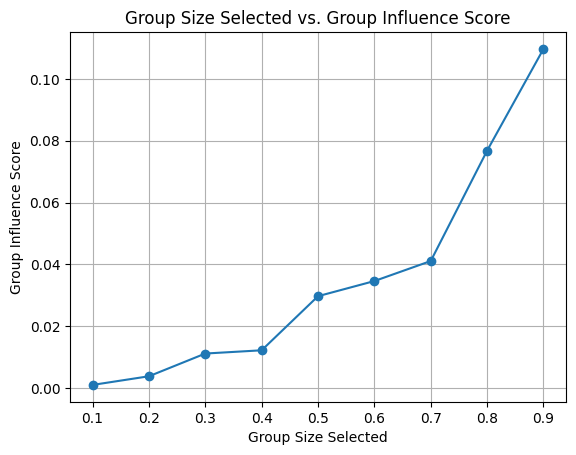

In [50]:
# Plot group size compared with the influence
plt.plot(group_sizes_selection, group_influence_scores, marker='o', linestyle='-')
plt.xlabel('Group Size Selected')
plt.ylabel('Group Influence Score')
plt.title('Group Size Selected vs. Group Influence Score')
plt.grid(True)
plt.show()

### Shapley Values

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

def machine_learning_algorithm(X, y):
    #random forest model 
    model = make_pipeline(
            StandardScaler(),
            RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_leaf=2))
    model.fit(X, y)
    return model

def performance_score(model, X_valid, y_valid):
    #using accuracy 
   predictions = model.predict(X_valid)
   return accuracy_score(y_valid, predictions)

In [52]:
from sklearn.dummy import DummyClassifier
#indices_selected = np.random.choice(len(X_train), size=30, replace=False)

def truncated_monte_carlo_shapley(X_train, y_train, machine_learning_algorithm, performance_score, X_valid, y_valid):

    n = len(indices_selected) # Number of instances in the training set

    #saving shapley values in dict by assigning 0
    shapley_points_dict = {f"{i}": 0 for i in indices_selected}

    #10 permutations
    num_permutations = 10

    #having counter
    t = 0
    for i in range(num_permutations):

        #incrementing counter
        t = t + 1 
        
        # Random permutation of instances in the training set
        shuffled_combinations = np.random.permutation(indices_selected)

        # Initial performance score on the entire training set
        accuracy_full_dataset = performance_score((machine_learning_algorithm(X_train, y_train)), X_valid, y_valid)

        dummy_clf = DummyClassifier(strategy="most_frequent")
        dummy_clf.fit(X_train, y_train)
        predictions = dummy_clf.predict(X_valid)
        
        accuracy_prev_iteration = accuracy_score(y_valid, predictions)
        
        for j in range(n):                                    
            shuffled_combinations_j = shuffled_combinations[:j+1]

            #finding performace difference
            performance_difference = (accuracy_full_dataset - accuracy_prev_iteration)
            
            #if performance difference is less than performance tolerance stop retraining the model
            if(performance_difference < 0.0001):
               accuracy = accuracy_prev_iteration
               break
            else:
                #calculating accuracy
               accuracy = performance_score(machine_learning_algorithm(X_train.iloc[shuffled_combinations_j], y_train.iloc[shuffled_combinations_j]),X_valid, y_valid)

            current_data_point = shuffled_combinations_j[-1]

            #assigning shapely values
            shapley_points_dict[f"{current_data_point}"]= ((t - 1) / t)* shapley_points_dict[f"{current_data_point}"] + 1/t*(accuracy - accuracy_prev_iteration)
            
            #print(shuffled_combinations_j , accuracy, accuracy_prev_iteration, accuracy - accuracy_prev_iteration )
            #print(shapley_points_dict)
            accuracy_prev_iteration = accuracy
            
    #Normalize Shapley values by dividing by the number of permutations
    shapley_points_dict_normalized = {key: value / num_permutations for key, value in shapley_points_dict.items()}
    print("Finished Shapley Computation.")
    return shapley_points_dict_normalized   
    
    

In [53]:
shapley_values = truncated_monte_carlo_shapley(X_train, y_train, machine_learning_algorithm, performance_score, X_valid, y_valid)
print(shapley_values)

Finished Shapley Computation.
{'20094': 0.001689697393737975, '10282': 0.00032359629176141353, '3524': -0.003172992828406506, '20799': 0.0015077838026937205, '10039': -0.0009952772433094279, '16537': 0.0005789749868812306, '5402': 0.0010215147804792718, '15387': -0.0027776806017141857, '7669': -0.000692670981283891, '3185': 0.0005387440965541364}


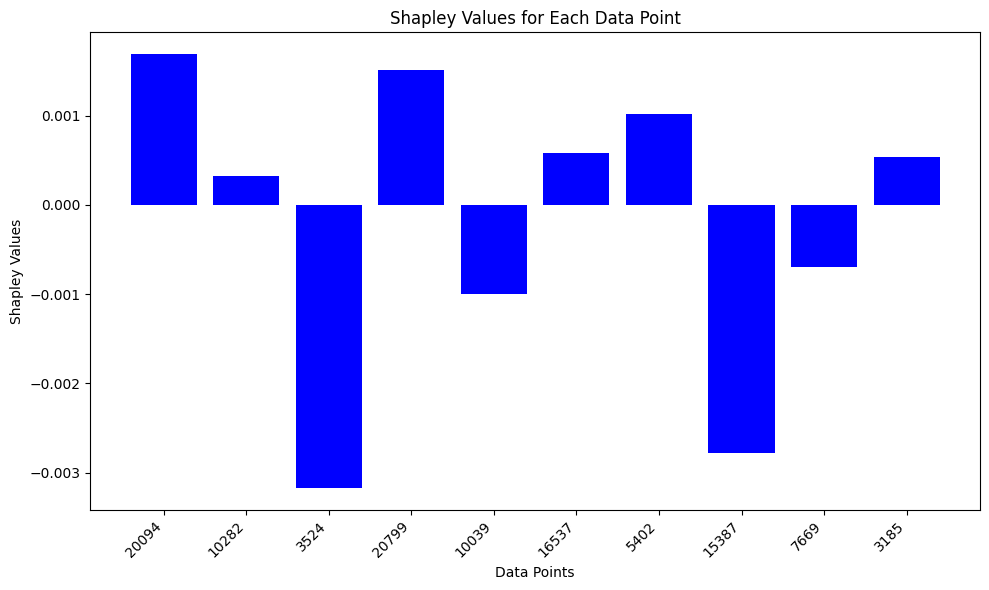

In [56]:
# Convert dictionary items to lists for plotting
data_points = list(shapley_values.keys())
values = list(shapley_values.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(data_points, values, color='blue')
plt.xlabel('Data Points')
plt.ylabel('Shapley Values')
plt.title('Shapley Values for Each Data Point')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

# # Example usage
# plot_shapley_values(shapley_values)

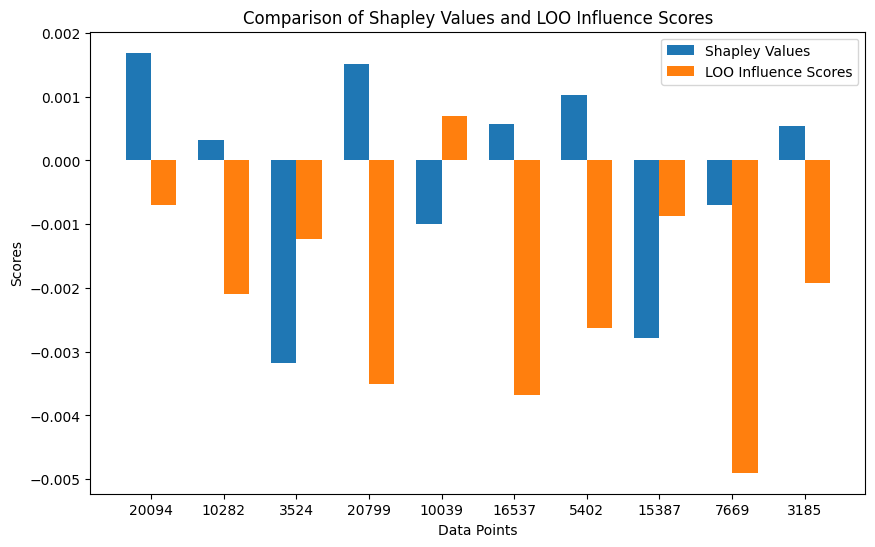

In [57]:
# Create a common list of data points
data_points = [str(index) for index in indices_selected]

# Extract Shapley values and LOO influence scores in the same order
values_shapley = [shapley_values[data_point] for data_point in data_points]
values_loo = loo_influence_scores

# Create a bar plot with two sets of bars side by side
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar([i - width/2 for i in range(len(data_points))], values_shapley, width, label='Shapley Values')
bar2 = ax.bar([i + width/2 for i in range(len(data_points))], values_loo, width, label='LOO Influence Scores')

# Add labels and title
ax.set_xlabel('Data Points')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Shapley Values and LOO Influence Scores')
ax.set_xticks(range(len(data_points)))
ax.set_xticklabels(data_points)
ax.legend()

# Display the plot
plt.show()